In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from src.functionalization import *

In [2]:
plt.style.use('ggplot')

In [3]:
raw = pd.read_csv('data/NeighborhoodFoodRetail.csv')

In [4]:
raw['geoid-tract'] = raw['GEOID10'].astype(str).str[:-1].astype(np.int64)

In [5]:
#Below csv is a way to join census block groups with census tract information.  
#Did not end up using because only average of 3 block groups per tract
'''
number of unique block groups: 1336
number of tracts: 384

'''

census = pd.read_csv('data/Philadelphia_Census_Tracts_2010_201302.csv')

In [6]:
raw.describe()

,OBJECTID,GEOID10,TOTAL_LPSS,LPSS_PER1000,TOTAL_HPSS,HPSS_PER1000,PCT_HPSS,PCT_VEHICLE_AVAILABILITY,TOTAL_RESTAURANTS,PCT_POVERTY,Shape__Area,Shape__Length,geoid-tract
count,1336.00000,1.336000e+03,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1326.000000,1336.000000,1327.000000,1.336000e+03,1336.000000,1.336000e+03
mean,668.50000,4.210103e+11,29.661132,31.087562,3.787736,3.817164,11.819979,68.049988,4.822605,26.520875,4.711942e+05,2735.171689,4.210103e+10
std,385.81429,8.764745e+05,19.908910,25.752759,4.542649,4.948151,9.602760,20.025984,11.213721,18.830053,1.420624e+06,2567.587028,8.764746e+04
min,1.00000,4.210100e+11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.854482e+04,714.420557,4.210100e+10
25%,334.75000,4.210101e+11,16.000000,13.045099,1.250000,1.238646,5.555556,53.727012,1.000000,11.043445,1.392045e+05,1621.215675,4.210101e+10
50%,668.50000,4.210102e+11,27.000000,24.469821,2.750000,2.557981,9.677419,69.917338,2.000000,22.905028,2.124640e+05,2081.372899,4.210102e+10
75%,1002.25000,4.210103e+11,39.000000,41.792853,4.250000,4.507212,15.789474,84.387384,5.000000,39.300387,3.887246e+05,3000.982831,4.210103e+10
max,1336.00000,4.210199e+11,148.000000,224.615385,32.000000,62.992126,80.952381,100.000000,174.000000,92.452830,3.497850e+07,40155.296102,4.210199e+10


In [7]:
census.describe()

,OBJECTID_1,OBJECTID,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,LOGRECNO,Shape_Length,Shape_Area
count,384.000000,384.000000,384.0,384.0,384.000000,3.840000e+02,384.000000,3.840000e+02,3.840000e+02,384.000000,384.000000,384.000000,384.000000,3.840000e+02
mean,192.500000,192.500000,42.0,101.0,47178.580729,4.210105e+10,471.785807,9.044821e+05,5.804533e+04,40.001359,-75.147337,10526.500000,13951.435081,1.034069e+07
std,110.995495,110.995495,0.0,0.0,161029.335452,1.610293e+05,1610.293355,1.254499e+06,3.247725e+05,0.052339,0.067570,110.995495,10239.117259,1.605469e+07
min,1.000000,1.000000,42.0,101.0,100.000000,4.210100e+10,1.000000,9.995800e+04,0.000000e+00,39.879890,-75.267904,10335.000000,4342.558559,1.135601e+06
25%,96.750000,96.750000,42.0,101.0,9575.000000,4.210101e+10,95.750000,3.974568e+05,0.000000e+00,39.957579,-75.193832,10430.750000,8971.319654,4.288051e+06
50%,192.500000,192.500000,42.0,101.0,20101.500000,4.210102e+10,201.015000,6.003620e+05,0.000000e+00,39.999032,-75.159724,10526.500000,11232.172295,6.459285e+06
75%,288.250000,288.250000,42.0,101.0,31101.250000,4.210103e+10,311.012500,9.554520e+05,0.000000e+00,40.042847,-75.110631,10622.250000,15276.435312,1.039250e+07
max,384.000000,384.000000,42.0,101.0,989100.000000,4.210199e+10,9891.000000,1.722870e+07,3.463789e+06,40.129088,-74.966739,10718.000000,100989.528600,2.213233e+08


In [8]:
census.sort_values('GEOID10')

,OBJECTID_1,OBJECTID,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,LOGRECNO,Shape_Length,Shape_Area
144,145,190,42,101,100,42101000100,1.00,Census Tract 1,G5020,S,704909,0,39.952383,-75.146663,10335,11381.432670,7.595557e+06
145,146,191,42,101,200,42101000200,2.00,Census Tract 2,G5020,S,382478,0,39.955400,-75.156977,10336,9279.187946,4.116628e+06
146,147,192,42,101,300,42101000300,3.00,Census Tract 3,G5020,S,548342,356,39.956878,-75.171666,10337,12679.901660,5.887110e+06
99,100,145,42,101,401,42101000401,4.01,Census Tract 4.01,G5020,S,214766,14981,39.954187,-75.175808,10338,6872.912592,2.513119e+06
98,99,144,42,101,402,42101000402,4.02,Census Tract 4.02,G5020,S,303680,0,39.953297,-75.168695,10339,8922.261202,3.268872e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,262,306,42,101,980600,42101980600,9806.00,Census Tract 9806,G5020,S,1286624,0,39.905538,-75.170715,10714,21279.820640,1.385038e+07
259,260,304,42,101,980700,42101980700,9807.00,Census Tract 9807,G5020,S,5957147,1730038,39.910468,-75.143166,10715,48820.671370,8.087268e+07
279,280,324,42,101,980800,42101980800,9808.00,Census Tract 9808,G5020,S,2106698,43823,39.971452,-75.262177,10716,41365.548380,2.336726e+07
254,255,299,42,101,980900,42101980900,9809.00,Census Tract 9809,G5020,S,17228698,3463789,39.905180,-75.217415,10717,100989.528600,2.213233e+08


In [9]:
raw.sort_values('GEOID10')

,OBJECTID,GEOID10,NON_RESIDENTIAL,TOTAL_LPSS,LPSS_PER1000,TOTAL_HPSS,HPSS_PER1000,PCT_HPSS,HPSS_ACCESS,SUPERMARKET_ACCESS,PCT_VEHICLE_AVAILABILITY,TOTAL_RESTAURANTS,PCT_POVERTY,HIGH_POVERTY,Shape__Area,Shape__Length,geoid-tract
403,404,421010001001,No,40.0,20.931449,6.50,3.401361,13.978495,Moderate or High Access,Yes,64.334471,116,7.587650,No,4.185576e+05,2640.024260,42101000100
180,181,421010001002,No,66.0,29.411765,13.00,5.793226,16.455696,Moderate or High Access,Yes,82.259414,35,6.550802,No,7.837095e+05,4510.466573,42101000100
187,188,421010002001,No,120.0,44.726053,17.75,6.615729,12.885662,Moderate or High Access,Yes,51.782178,105,37.607506,Yes,6.516972e+05,3688.952987,42101000200
207,208,421010003001,No,120.0,131.868132,20.50,22.527473,14.590747,Moderate or High Access,Yes,47.816594,52,8.760951,No,5.501606e+05,3188.700686,42101000300
302,303,421010003002,No,62.0,23.628049,14.75,5.621189,19.218241,Moderate or High Access,Yes,64.142539,8,8.346582,No,3.819913e+05,2856.746779,42101000300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,377,421019806001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,2.189288e+06,8458.313890,42101980600
212,213,421019807001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,NaN,NaN,1.278324e+07,19410.087844,42101980700
384,385,421019808001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,3.701706e+06,16464.480283,42101980800
210,211,421019809001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,NaN,NaN,3.497850e+07,40155.296102,42101980900


## Initial Look

In [10]:
raw.columns

Index(['OBJECTID', 'GEOID10', 'NON_RESIDENTIAL', 'TOTAL_LPSS', 'LPSS_PER1000',
       'TOTAL_HPSS', 'HPSS_PER1000', 'PCT_HPSS', 'HPSS_ACCESS',
       'SUPERMARKET_ACCESS', 'PCT_VEHICLE_AVAILABILITY', 'TOTAL_RESTAURANTS',
       'PCT_POVERTY', 'HIGH_POVERTY', 'Shape__Area', 'Shape__Length',
       'geoid-tract'],
      dtype='object')

In [11]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1336 entries, 0 to 1335
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   OBJECTID                  1336 non-null   int64  
 1   GEOID10                   1336 non-null   int64  
 2   NON_RESIDENTIAL           1336 non-null   object 
 3   TOTAL_LPSS                1325 non-null   float64
 4   LPSS_PER1000              1325 non-null   float64
 5   TOTAL_HPSS                1325 non-null   float64
 6   HPSS_PER1000              1325 non-null   float64
 7   PCT_HPSS                  1325 non-null   float64
 8   HPSS_ACCESS               1325 non-null   object 
 9   SUPERMARKET_ACCESS        1325 non-null   object 
 10  PCT_VEHICLE_AVAILABILITY  1326 non-null   float64
 11  TOTAL_RESTAURANTS         1336 non-null   int64  
 12  PCT_POVERTY               1327 non-null   float64
 13  HIGH_POVERTY              1327 non-null   object 
 14  Shape__A

In [12]:
#adjust column names, drop objectid (use GEOID10 as unique identifier)

raw.columns = ['id', 'geoid', 'non_res', 'tot_lpss', 'lpss_per_1000',
       'tot_hpss', 'hpss_per_1000', 'pct_hpss', 'hpss_access',
       'sprmkt_access', 'pct_vehicle_avail', 'tot_restaurants',
       'pct_poverty', 'high_poverty', 'area', 'length', 'geoid-tract']

raw.drop('id', axis = 1, inplace = True)

raw.columns

Index(['geoid', 'non_res', 'tot_lpss', 'lpss_per_1000', 'tot_hpss',
       'hpss_per_1000', 'pct_hpss', 'hpss_access', 'sprmkt_access',
       'pct_vehicle_avail', 'tot_restaurants', 'pct_poverty', 'high_poverty',
       'area', 'length', 'geoid-tract'],
      dtype='object')

In [13]:
raw.head()

,geoid,non_res,tot_lpss,lpss_per_1000,tot_hpss,hpss_per_1000,pct_hpss,hpss_access,sprmkt_access,pct_vehicle_avail,tot_restaurants,pct_poverty,high_poverty,area,length,geoid-tract
0,421010108001,No,25.0,30.674847,2.50,3.067485,9.090909,Moderate or High Access,Yes,44.268775,0,54.969325,Yes,275942.097656,3260.316044,42101010800
1,421010108002,No,21.0,28.806584,1.75,2.400549,7.692308,Moderate or High Access,Yes,67.611336,2,37.860082,Yes,176880.882812,1736.152373,42101010800
2,421010109002,No,7.0,17.114914,0.50,1.222494,6.666667,Low Access,No,37.356322,1,57.212714,Yes,74520.027344,1211.853466,42101010900
3,421010110002,No,15.0,19.480519,2.75,3.571429,15.492958,Moderate or High Access,Yes,52.824859,0,19.480519,No,185771.992188,2057.362419,42101011000
4,421010110001,No,17.0,25.914634,2.50,3.810976,12.820513,Moderate or High Access,Yes,70.408163,1,52.134146,Yes,242486.906250,4166.159591,42101011000


## Handling Null Data:

* 11 Null values in columns: 'tot_lpss', 'lpss_per_1000', 'tot_hpss',
       'hpss_per_1000', 'pct_hpss', 'hpss_access', 'sprmkt_access'
       
* 10 Null values in columns: 'pct_vehicle_avail'
* 9 Null values in columns: 'pct_poverty'

In [14]:
# Looking at 11 nulls for **SS categories: All Non-residential 

print(f'Number of Null Rows: {len(raw[raw["tot_lpss"].isna()])}')

raw[raw['tot_lpss'].isna()]

Number of Null Rows: 11


,geoid,non_res,tot_lpss,lpss_per_1000,tot_hpss,hpss_per_1000,pct_hpss,hpss_access,sprmkt_access,pct_vehicle_avail,tot_restaurants,pct_poverty,high_poverty,area,length,geoid-tract
57,421010050001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,1.395457e+07,19077.397532,42101005000
190,421019805001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,7.091363e+05,3497.167229,42101980500
210,421019809001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,NaN,NaN,3.497850e+07,40155.296102,42101980900
212,421019807001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,NaN,NaN,1.278324e+07,19410.087844,42101980700
213,421019801001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.452830,3,13.265306,No,1.006789e+07,39471.537984,42101980100
283,421019800001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.604396,36,4.945055,No,1.780644e+07,27702.726031,42101980000
369,421019802001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.956522,1,11.455108,No,9.214561e+06,34834.687659,42101980200
376,421019806001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,2.189288e+06,8458.313890,42101980600
384,421019808001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,3.701706e+06,16464.480283,42101980800
701,421019803001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,NaN,NaN,1.303118e+07,14608.573156,42101980300


In [15]:
# Looking at nulls for pct_poverty:

print(f'Number of Null Rows: {len(raw[raw["pct_poverty"].isna()])}')

raw[raw['pct_poverty'].isna()]

Number of Null Rows: 9


,geoid,non_res,tot_lpss,lpss_per_1000,tot_hpss,hpss_per_1000,pct_hpss,hpss_access,sprmkt_access,pct_vehicle_avail,tot_restaurants,pct_poverty,high_poverty,area,length,geoid-tract
57,421010050001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,1.395457e+07,19077.397532,42101005000
183,421010369001,No,27.0,212.598425,8.0,62.992126,22.857143,Moderate or High Access,Yes,NaN,36,NaN,NaN,8.377759e+05,5412.929429,42101036900
190,421019805001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,7.091363e+05,3497.167229,42101980500
210,421019809001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,NaN,NaN,3.497850e+07,40155.296102,42101980900
212,421019807001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,NaN,NaN,1.278324e+07,19410.087844,42101980700
376,421019806001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,2.189288e+06,8458.313890,42101980600
384,421019808001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,3.701706e+06,16464.480283,42101980800
701,421019803001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,NaN,NaN,1.303118e+07,14608.573156,42101980300
1019,421019804001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,5.056550e+06,13040.204472,42101980400


In [16]:
# Looking at nulls for pct_vehicle_avail:

print(f'Number of Null Rows: {len(raw[raw["pct_vehicle_avail"].isna()])}')

raw[raw['pct_vehicle_avail'].isna()]

Number of Null Rows: 10


,geoid,non_res,tot_lpss,lpss_per_1000,tot_hpss,hpss_per_1000,pct_hpss,hpss_access,sprmkt_access,pct_vehicle_avail,tot_restaurants,pct_poverty,high_poverty,area,length,geoid-tract
57,421010050001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,1.395457e+07,19077.397532,42101005000
183,421010369001,No,27.0,212.598425,8.0,62.992126,22.857143,Moderate or High Access,Yes,NaN,36,NaN,NaN,8.377759e+05,5412.929429,42101036900
190,421019805001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,7.091363e+05,3497.167229,42101980500
210,421019809001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,NaN,NaN,3.497850e+07,40155.296102,42101980900
212,421019807001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,NaN,NaN,1.278324e+07,19410.087844,42101980700
376,421019806001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,2.189288e+06,8458.313890,42101980600
384,421019808001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,3.701706e+06,16464.480283,42101980800
701,421019803001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,NaN,NaN,1.303118e+07,14608.573156,42101980300
829,421019891001,No,5.0,1.971609,0.0,0.000000,0.000000,No Access,No,NaN,3,92.45283,Yes,7.014906e+06,12283.283540,42101989100
1019,421019804001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,5.056550e+06,13040.204472,42101980400


Observation: most of null values are shared across columns and are non-residential.
They will not add insight to our analysis.  These 13 total rows will be dropped from the initial raw dataset.  
New dataframe will be called "df".

In [17]:
df = raw.dropna()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1323 entries, 0 to 1335
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   geoid              1323 non-null   int64  
 1   non_res            1323 non-null   object 
 2   tot_lpss           1323 non-null   float64
 3   lpss_per_1000      1323 non-null   float64
 4   tot_hpss           1323 non-null   float64
 5   hpss_per_1000      1323 non-null   float64
 6   pct_hpss           1323 non-null   float64
 7   hpss_access        1323 non-null   object 
 8   sprmkt_access      1323 non-null   object 
 9   pct_vehicle_avail  1323 non-null   float64
 10  tot_restaurants    1323 non-null   int64  
 11  pct_poverty        1323 non-null   float64
 12  high_poverty       1323 non-null   object 
 13  area               1323 non-null   float64
 14  length             1323 non-null   float64
 15  geoid-tract        1323 non-null   int64  
dtypes: float64(9), int64(3),

In [18]:
df.describe()

,geoid,tot_lpss,lpss_per_1000,tot_hpss,hpss_per_1000,pct_hpss,pct_vehicle_avail,tot_restaurants,pct_poverty,area,length,geoid-tract
count,1.323000e+03,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1.323000e+03,1323.000000,1.323000e+03
mean,4.210102e+11,29.681784,30.972374,3.787415,3.775322,11.820571,67.996425,4.738473,26.508755,3.765455e+05,2569.745043,4.210102e+10
std,1.133177e+05,19.912270,25.271168,4.543413,4.675435,9.599723,20.016295,11.137889,18.753629,5.860417e+05,1567.624466,1.133177e+04
min,4.210100e+11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.854482e+04,714.420557,4.210100e+10
25%,4.210101e+11,16.000000,13.070168,1.250000,1.239927,5.555556,53.694266,1.000000,11.043445,1.385243e+05,1617.945640,4.210101e+10
50%,4.210102e+11,27.000000,24.469821,2.750000,2.557981,9.677419,69.856459,2.000000,22.909091,2.119770e+05,2071.517104,4.210102e+10
75%,4.210103e+11,39.000000,41.753900,4.250000,4.505858,15.789474,84.330495,5.000000,39.300387,3.811675e+05,2974.440984,4.210103e+10
max,4.210104e+11,148.000000,224.615385,32.000000,47.339593,80.952381,100.000000,174.000000,88.194444,8.317655e+06,15886.036994,4.210104e+10


## Supermarket Access: Is there an Impact? 

Split dataframe based on sprmrkt_access (Yes or No)

In [19]:
sprmkt_access = df[df['sprmkt_access']=='Yes']
len(sprmkt_access)

1051

In [20]:
no_sprmkt_access = df[df['sprmkt_access']=='No']
len(no_sprmkt_access)

272

In [21]:
print(f"% Poverty WITH Super Market Access:  \n Mean: {sprmkt_access['pct_poverty'].mean()}  \n Standard Deviation: {sprmkt_access['pct_poverty'].std()}")

print(f"\n \n % Poverty WITHOUT Super Market Access:  \n Mean: {no_sprmkt_access['pct_poverty'].mean()}  \n Standard Deviation: {no_sprmkt_access['pct_poverty'].std()}")

% Poverty WITH Super Market Access:  
 Mean: 26.90533879603233  
 Standard Deviation: 18.924319713806238

 
 % Poverty WITHOUT Super Market Access:  
 Mean: 24.976368040845596  
 Standard Deviation: 18.030845828927923


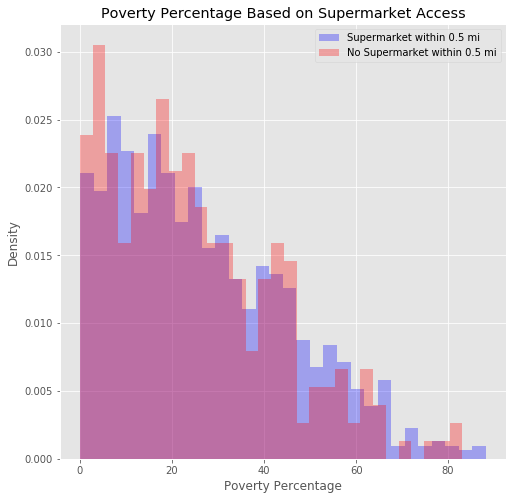

In [58]:
fig, ax = plt.subplots(figsize = (8, 8))
data = [sprmkt_access['pct_poverty'], no_sprmkt_access['pct_poverty']]
labels = ['Supermarket within 0.5 mi', 'No Supermarket within 0.5 mi']
colors = ['blue', 'red']

#from functionalization.py
overlay_histograms(ax, data, labels, colors, xlabel = 'Poverty Percentage', title = 'Poverty Percentage Based on Supermarket Access')
ax.set_ylabel('Density')
fig.savefig('images/Hists_pct_pov_by_supermarket.jpeg')
plt.show();


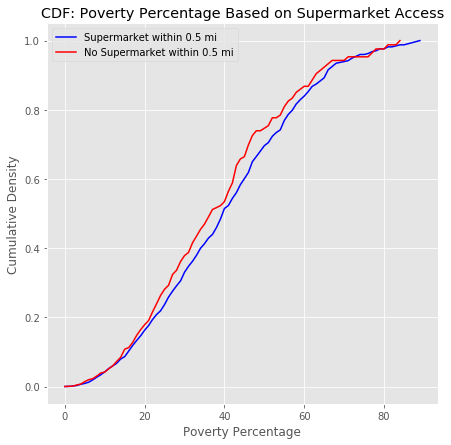

In [54]:

dfs_c = [sprmkt_access, no_sprmkt_access]
colors = ['blue', 'red']
columns_c = ['pct_poverty', 'pct_poverty']
labels_c = ['Supermarket within 0.5 mi', 'No Supermarket within 0.5 mi']
fig, ax = plt.subplots(figsize = (7,7))
ax.set_xlabel('Poverty Percentage')
ax.set_ylabel('Cumulative Density')

overlay_plots(ax, dfs_c, columns_c, labels_c, colors, 'CDF: Poverty Percentage Based on Supermarket Access')
fig.savefig('images/CDF_pct_pov_by_supermarket.jpeg')
plt.show();

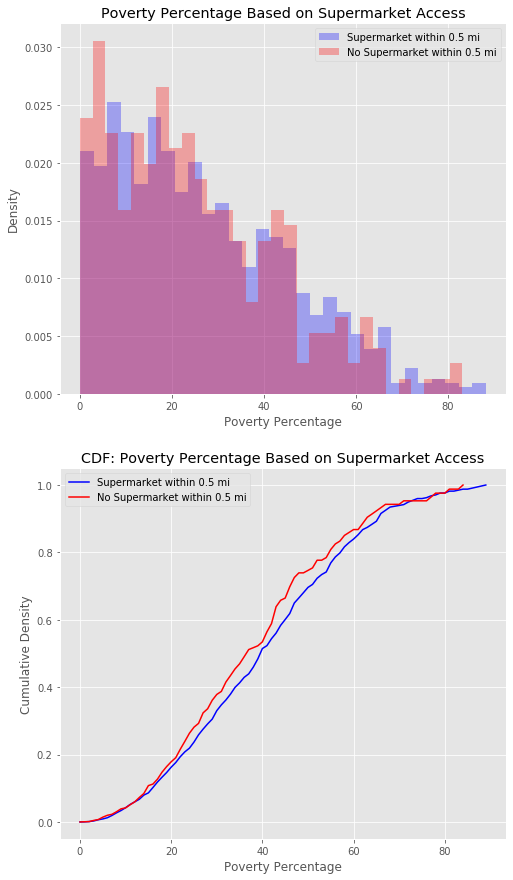

In [59]:
fig, ax = plt.subplots(2, figsize = (8, 15))
data = [sprmkt_access['pct_poverty'], no_sprmkt_access['pct_poverty']]
labels = ['Supermarket within 0.5 mi', 'No Supermarket within 0.5 mi']
colors = ['blue', 'red']
overlay_histograms(ax[0], data, labels, colors, xlabel = 'Poverty Percentage', title = 'Poverty Percentage Based on Supermarket Access')
ax[0].set_ylabel('Density')

dfs_c = [sprmkt_access, no_sprmkt_access]
columns_c = ['pct_poverty', 'pct_poverty']
labels_c = ['Supermarket within 0.5 mi', 'No Supermarket within 0.5 mi']
ax[1].set_xlabel('Poverty Percentage')
ax[1].set_ylabel('Cumulative Density')

overlay_plots(ax[1], dfs_c, columns_c, labels_c, colors, 'CDF: Poverty Percentage Based on Supermarket Access')


fig.savefig('images/pdfandcdf_pct_pov_by_supermarket.jpeg')
plt.show();

### Closer Look: Poverty Percentage

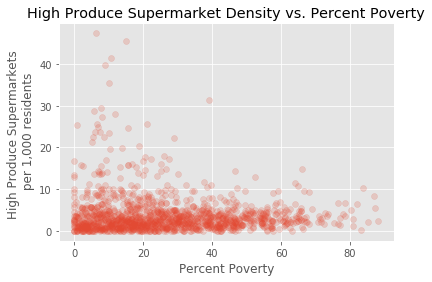

In [24]:
fig, ax = plt.subplots()
ax.scatter(df['pct_poverty'], df['hpss_per_1000'], alpha = 0.2)
ax.set_xlabel('Percent Poverty')
ax.set_ylabel('High Produce Supermarkets \n per 1,000 residents')
ax.set_title('High Produce Supermarket Density vs. Percent Poverty');

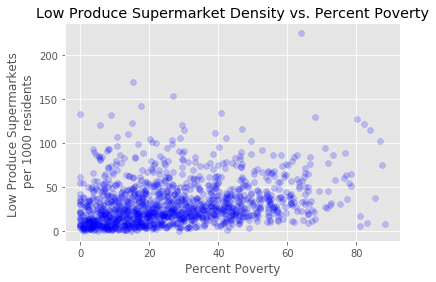

In [25]:
fig, ax = plt.subplots()
ax.scatter(df['pct_poverty'], df['lpss_per_1000'], alpha = 0.2, color = 'blue')
ax.set_xlabel('Percent Poverty')
ax.set_ylabel('Low Produce Supermarkets \n per 1000 residents')
ax.set_title('Low Produce Supermarket Density vs. Percent Poverty');


### Vehicle Access based on Supermarket Access

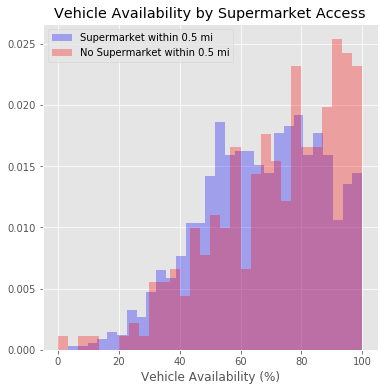

In [26]:
fig, ax = plt.subplots(figsize = (6,6))
data = [sprmkt_access['pct_vehicle_avail'], no_sprmkt_access['pct_vehicle_avail']]
labels = ['Supermarket within 0.5 mi', 'No Supermarket within 0.5 mi']
colors = ['blue', 'red']

#from functionalization.py
overlay_histograms(ax, data, labels, colors, xlabel = 'Vehicle Availability (%)', title = 'Vehicle Availability by Supermarket Access')

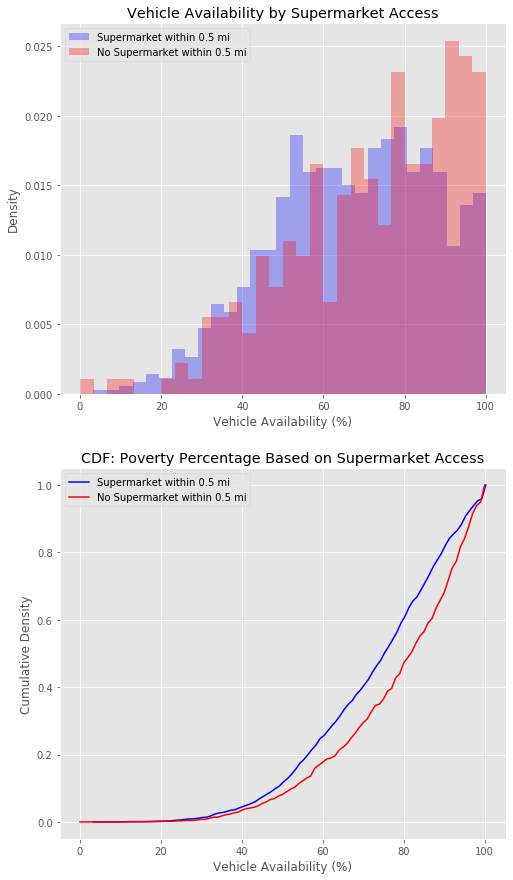

In [61]:
fig, ax = plt.subplots(2, figsize = (8, 15))
data = [sprmkt_access['pct_vehicle_avail'], no_sprmkt_access['pct_vehicle_avail']]
labels = ['Supermarket within 0.5 mi', 'No Supermarket within 0.5 mi']
colors = ['blue', 'red']
overlay_histograms(ax[0], data, labels, colors, xlabel = 'Vehicle Availability (%)', title = 'Vehicle Availability by Supermarket Access')
ax[0].set_ylabel('Density')

dfs_c = [sprmkt_access, no_sprmkt_access]
columns_c = ['pct_vehicle_avail', 'pct_vehicle_avail']
labels_c = ['Supermarket within 0.5 mi', 'No Supermarket within 0.5 mi']
ax[1].set_xlabel('Vehicle Availability (%)')
ax[1].set_ylabel('Cumulative Density')

overlay_plots(ax[1], dfs_c, columns_c, labels_c, colors, 'CDF: Poverty Percentage Based on Supermarket Access')


fig.savefig('images/pdfandcdf_pct_vehicle_by_supermarket.jpeg')
plt.show();

Perform Welche's t-test: 2 independent samples, equal variance = False

Ho: the mean vehicle availability for areas with supermarket access is the 
same as the mean vehicle availability for areas without supermarket access

Ha: the mean vehicle availability for areas with supermarket access is 
different than the mean vehicle availability for areas without supermarket access

significance level (alpha) = 0.05

In [27]:
perform_two_samp_ttest(sprmkt_access['pct_vehicle_avail'], no_sprmkt_access['pct_vehicle_avail'])

'p-value = 0.00022145585274292593: Reject the Null Hypothesis'

In [28]:
print(f"Vehicle Availablility WITH Super Market Access:  \n Mean: {np.mean(sprmkt_access['pct_vehicle_avail'])}  \n Standard Deviation: {np.std(sprmkt_access['pct_vehicle_avail'], ddof = 1)}")

print(f"\n \n Vehicle Availablility WITHOUT Super Market Access:  \n Mean: {no_sprmkt_access['pct_vehicle_avail'].mean()}  \n Standard Deviation: {np.std(no_sprmkt_access['pct_vehicle_avail'], ddof = 1)}")

Vehicle Availablility WITH Super Market Access:  
 Mean: 66.93586329526163  
 Standard Deviation: 19.761411173992382

 
 Vehicle Availablility WITHOUT Super Market Access:  
 Mean: 72.09440593992645  
 Standard Deviation: 20.498673409248337


In [62]:
66.93586329526163 - 72.09440593992645  

-5.15854264466482

### Look at Poverty Classification
* High poverty: areas where >20% of residents are below the federal poverty line

In [29]:
#create data frames based on poverty classification

high_pov = df[df['high_poverty']=='Yes']
not_high_pov = df[df['high_poverty']=='No']

##### High Produce Supply Stores per 1,000 Residents based on Poverty Classification

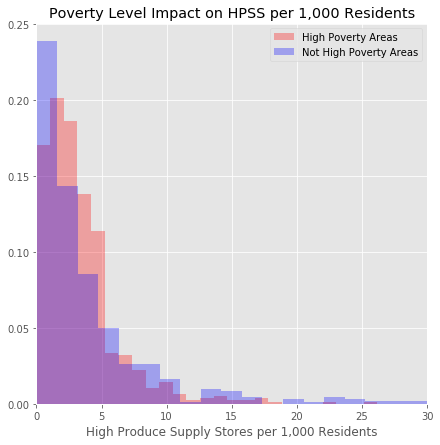

In [30]:
fig, ax = plt.subplots(figsize = (7,7))

data = [high_pov['hpss_per_1000'], not_high_pov['hpss_per_1000']]
labels = ['High Poverty Areas', 'Not High Poverty Areas']
colors = ['red', 'blue']

#from functionalization.py
overlay_histograms(ax, data, labels, colors, xlabel = 'High Produce Supply Stores per 1,000 Residents', title = 'Poverty Level Impact on HPSS per 1,000 Residents')
ax.set_xlim(0, 30);

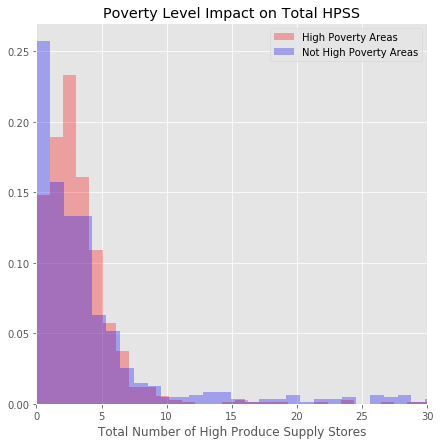

In [31]:
fig, ax = plt.subplots(figsize = (7,7))

data = [high_pov['tot_hpss'], not_high_pov['tot_hpss']]
labels = ['High Poverty Areas', 'Not High Poverty Areas']
colors = ['red', 'blue']

#from functionalization.py
overlay_histograms(ax, data, labels, colors, xlabel = 'Total Number of High Produce Supply Stores', title = 'Poverty Level Impact on Total HPSS')
ax.set_xlim(0, 30);

In [32]:
print(f"High Poverty Areas: HPSS per 1,000 Residents  \n Mean: {high_pov['hpss_per_1000'].mean()}  \n Standard Deviation: {high_pov['hpss_per_1000'].std(ddof = 1)} \n Median: {high_pov['hpss_per_1000'].median()}")
print(f"\n \n Not High Poverty Areas: HPSS per 1,000 Residents  \n Mean: {not_high_pov['hpss_per_1000'].mean()}  \n Standard Deviation: {not_high_pov['hpss_per_1000'].std(ddof = 1)} \n Median: {not_high_pov['hpss_per_1000'].median()}")


High Poverty Areas: HPSS per 1,000 Residents  
 Mean: 3.3916691824357206  
 Standard Deviation: 3.1997347866450787 
 Median: 2.68048606

 
 Not High Poverty Areas: HPSS per 1,000 Residents  
 Mean: 4.260799822654104  
 Standard Deviation: 6.015450479604703 
 Median: 2.3598893949999997


Perform Welche's t-test: 2 independent samples, equal variance = False

Ho: the mean # high produce supply stores per 1,000 residents for high poverty areas is the same as
the mean # high produce supply stores per 1,000 residents for ares not classified as high poverty

Ha: the mean # high produce supply stores per 1,000 residents for high poverty areas is different
the mean # high produce supply stores per 1,000 residents for ares not classified as high poverty

significance level (alpha) = 0.05

In [33]:
perform_two_samp_ttest(high_pov['hpss_per_1000'], not_high_pov['hpss_per_1000'])

'p-value = 0.001653773426161172: Reject the Null Hypothesis'

### ^^^^placeholder - Would like to test for practical significance...

##### Low Produce Supply Stores per 1,000 Residents based on Poverty Classification

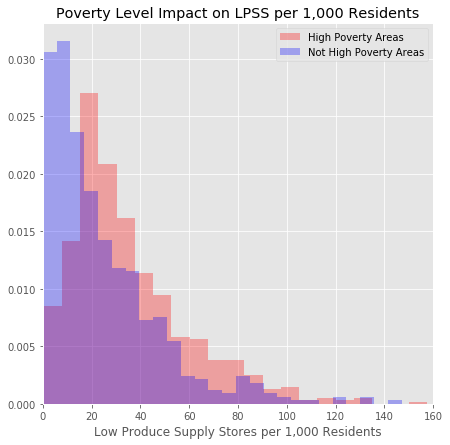

In [34]:
fig, ax = plt.subplots(figsize = (7,7))

data = [high_pov['lpss_per_1000'], not_high_pov['lpss_per_1000']]
labels = ['High Poverty Areas', 'Not High Poverty Areas']
colors = ['red', 'blue']

#from functionalization.py
overlay_histograms(ax, data, labels, colors, xlabel = 'Low Produce Supply Stores per 1,000 Residents', title = 'Poverty Level Impact on LPSS per 1,000 Residents')
ax.set_xlim(0, 160);

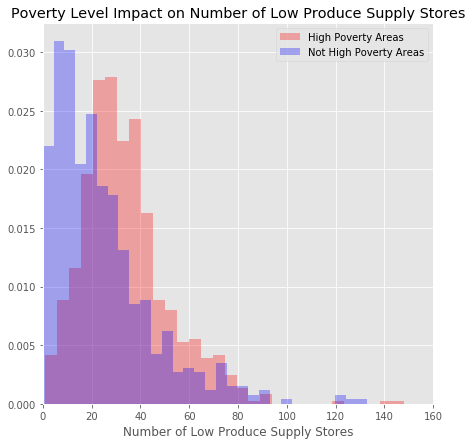

In [35]:
fig, ax = plt.subplots(figsize = (7,7))

data = [high_pov['tot_lpss'], not_high_pov['tot_lpss']]
labels = ['High Poverty Areas', 'Not High Poverty Areas']
colors = ['red', 'blue']

#from functionalization.py
overlay_histograms(ax, data, labels, colors, xlabel = 'Number of Low Produce Supply Stores', title = 'Poverty Level Impact on Number of Low Produce Supply Stores')
ax.set_xlim(0, 160);

In [36]:
print(f"High Poverty Areas: LPSS per 1,000 Residents  \n Mean: {high_pov['lpss_per_1000'].mean()}  \n Standard Deviation: {high_pov['lpss_per_1000'].std(ddof = 1)}")
print(f"\n \n Not High Poverty Areas: LPSS per 1,000 Residents  \n Mean: {not_high_pov['lpss_per_1000'].mean()}  \n Standard Deviation: {not_high_pov['lpss_per_1000'].std(ddof = 1)}")


High Poverty Areas: LPSS per 1,000 Residents  
 Mean: 35.69629936443842  
 Standard Deviation: 25.303419912292952

 
 Not High Poverty Areas: LPSS per 1,000 Residents  
 Mean: 24.99466610030821  
 Standard Deviation: 23.94956353088885


Perform Welche's t-test: 2 independent samples, equal variance = False

Ho: the mean # low produce supply stores per 1,000 residents for high poverty areas is the same as the mean # low produce supply stores per 1,000 residents for ares not classified as high poverty

Ha: the mean # low produce supply stores per 1,000 residents for high poverty areas is different the mean # low produce supply stores per 1,000 residents for ares not classified as high poverty

significance level (alpha) = 0.05

In [37]:
perform_two_samp_ttest(high_pov['lpss_per_1000'], not_high_pov['lpss_per_1000'])

'p-value = 7.445849586992817e-15: Reject the Null Hypothesis'

#### HPSS Percentage based on Poverty Classification

* Percent HPSS = HPSS / (HPSS + LPSS)

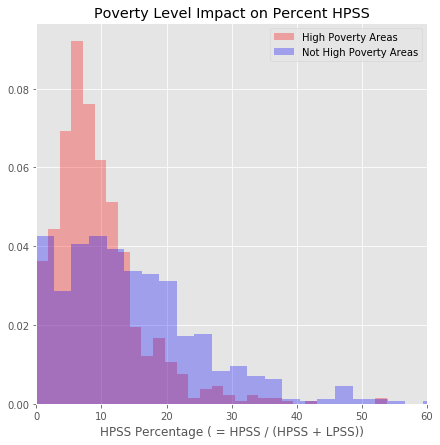

In [38]:
fig, ax = plt.subplots(figsize = (7,7))

data = [high_pov['pct_hpss'], not_high_pov['pct_hpss']]
labels = ['High Poverty Areas', 'Not High Poverty Areas']
colors = ['red', 'blue']

#from functionalization.py
overlay_histograms(ax, data, labels, colors, xlabel = 'HPSS Percentage ( = HPSS / (HPSS + LPSS))', title = 'Poverty Level Impact on Percent HPSS')
ax.set_xlim(0, 60);

In [39]:
#summary stats for %hpss based on poverty classification

print(f"High Poverty Areas: HPSS Percentage  \n Mean: {high_pov['pct_hpss'].mean()}  \n Standard Deviation: {high_pov['pct_hpss'].std(ddof = 1)} \n Variance High Pov: {high_pov['pct_hpss'].var(ddof =1)}")

print(f"\n \n Not High Poverty Areas: HPSS Percentage  \n Mean: {not_high_pov['pct_hpss'].mean()}  \n Standard Deviation: {not_high_pov['pct_hpss'].std(ddof = 1)} \n Variance Not High Pov: {not_high_pov['pct_hpss'].var(ddof = 1)}")


High Poverty Areas: HPSS Percentage  
 Mean: 9.412744631583218  
 Standard Deviation: 6.847574515657955 
 Variance High Pov: 46.88927674748828

 
 Not High Poverty Areas: HPSS Percentage  
 Mean: 14.867461035256857  
 Standard Deviation: 11.53101311872929 
 Variance Not High Pov: 132.964263544307


Perform Welche's t-test: 2 independent samples, equal variance = False

Ho: the mean %HPSS for high poverty areas is the same as the mean %HPSS for ares not classified as high poverty

Ha: the mean # high produce supply stores per 1,000 residents for high poverty areas is different the mean # high produce supply stores per 1,000 residents for ares not classified as high poverty

significance level (alpha) = 0.05

In [40]:
#calculate t-statistic by handassume unequalvariance

high_pov_pct_hpss_mean = high_pov['pct_hpss'].mean()
high_pov_pct_hpss_var  = high_pov['pct_hpss'].var()
high_pov_n = len(high_pov)
not_pov_pct_hpss_mean  = not_high_pov['pct_hpss'].mean()
not_pov_pct_hpss_var  = not_high_pov['pct_hpss'].var()
not_pov_n = len(not_high_pov)

tstat = (not_pov_pct_hpss_mean - high_pov_pct_hpss_mean) / np.sqrt(high_pov_pct_hpss_var/high_pov_n + not_pov_pct_hpss_var/not_pov_n)
tstat

10.109509054188702

In [ ]:
perform_two_samp_ttest(high_pov['pct_hpss'], not_high_pov['pct_hpss'])

##### What do the cumulative density functions look like for %HPSS based on Poverty Classification?

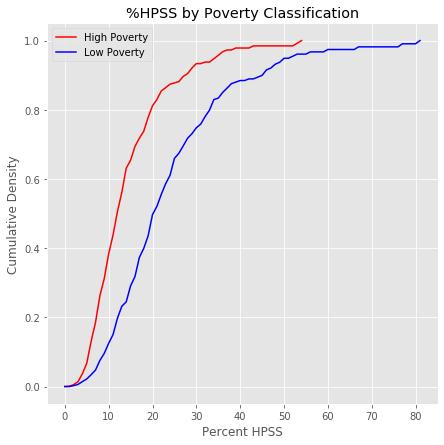

In [51]:

dfs = [high_pov, not_high_pov]
colors = ['red', 'blue']
columns = ['pct_hpss', 'pct_hpss']
labels = ['High Poverty', 'Low Poverty']
fig, ax = plt.subplots(figsize = (7,7))
ax.set_xlabel('Percent HPSS')
ax.set_ylabel('Cumulative Density')

overlay_plots(ax, dfs, columns, labels, colors, '%HPSS by Poverty Classification')
fig.savefig('images/CDF_pct_hpss_by_poverty.jpeg')
plt.show();

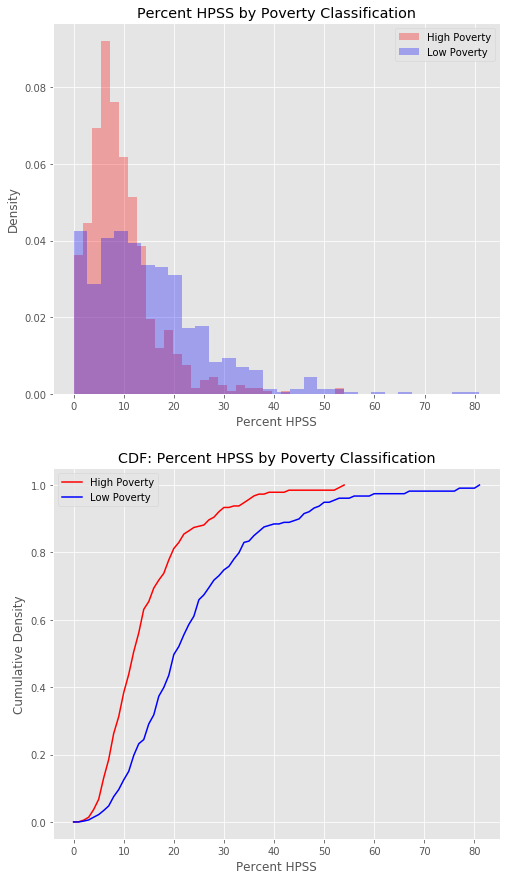

In [65]:
fig, ax = plt.subplots(2, figsize = (8, 15))
data = [high_pov['pct_hpss'], not_high_pov['pct_hpss']]
labels = ['High Poverty', 'Low Poverty']
colors = ['red', 'blue']
overlay_histograms(ax[0], data, labels, colors, xlabel = 'Percent HPSS', title = 'Percent HPSS by Poverty Classification')
ax[0].set_ylabel('Density')

dfs_c = [high_pov, not_high_pov]
columns_c = ['pct_hpss', 'pct_hpss']
labels_c = ['High Poverty', 'Low Poverty']
ax[1].set_xlabel('Percent HPSS')
ax[1].set_ylabel('Cumulative Density')

overlay_plots(ax[1], dfs_c, columns_c, labels_c, colors, 'CDF: Percent HPSS by Poverty Classification')


fig.savefig('images/pdfandcdf_pct_HPSS_by_poverty.jpeg')
plt.show();

### Look at Potential Correlations within Dataset

In [ ]:
from pandas.plotting import scatter_matrix
scatter_cols = ['tot_lpss', 'lpss_per_1000', 'tot_hpss',
       'hpss_per_1000', 'pct_hpss',
       'pct_vehicle_avail', 'pct_poverty']
df_sub = df[scatter_cols]
scatter_matrix(df_sub, alpha = 0.2, figsize = (20, 20), diagonal = 'kde');

In [ ]:
#Looked Interesting but Weak
fig, ax = plt.subplots()
ax.scatter(df['pct_hpss'], df['pct_poverty'], alpha = 0.2);


In [ ]:
#Is there any correlation between pct hpss and pct poverty? 
r,_ = stats.spearmanr(df['pct_hpss'], df['pct_poverty'])
r

## MLE for Poisson - modeling pct hpss based on poverty classification

Start: Model percent hpss for high poverty areas
high_pov['pct_hpss']

Poisson model
looking for maximum likelihood value of lmbda given the data
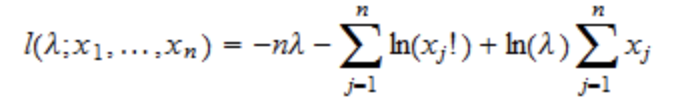



In [ ]:
#lambda is data.mean

In [ ]:
import math


In [ ]:
def log_likelihood_poisson(data, mu):
    log_lik = -len(data)*mu
    for datum in data:
        log_lik -= math.log(math.factorial(datum)) - (np.log(mu)) * (datum)
    return log_lik

In [ ]:
#test out function
lams = np.arange(1, 10)
d = [1, 2, 2, 3, 4, 4, 4, 4, 4, 4, 4,4 ,0,7, 8, 9, 30]
for lam in lams: 
    print(f"lam: {lam}, log-likelihood: {log_likelihood_poisson(d, lam)}")


In [ ]:
# Get approx range for mu for high pov and pct hpss --> note can't do for others 
#because non integral values....what should I do?  convert to int? 

lams = np.arange(30, 40, 0.5)
y = np.array(high_pov['lpss_per_1000']).astype(int)

for lam in lams:
    print(f"lam: {lam}, log-likelihood: {log_likelihood_poisson(y, lam)}")
 

In [ ]:
lams = np.arange(20, 30, 0.5)
y = np.array(not_high_pov['lpss_per_1000']).astype(int)

for lam in lams:
    print(f"lam: {lam}, log-likelihood: {log_likelihood_poisson(y, lam)}")
 

### APPROXIMATE RANGE: 
lambda between 8.5-9.5 for high poverty %hpss

lambda between 14 - 15 for not high poverty%hpss

between 33.5 - 34.5 for high pov tot_lpss

24 - 25 for not high pov tot_lpss

In [ ]:

mean_high_pov = high_pov['tot_lpss'].mean()
mean_high_pov

In [ ]:
dist = stats.poisson(mean_high_pov)

In [ ]:
fig, ax = plt.subplots()
x = np.linspace(0, 150, 151)

ax.hist(high_pov['tot_lpss'], density = True)
ax.plot(x, dist.pmf(x));

In [ ]:
def mle_poisson(data, lams):
    log_liks = []
    y = np.array(data).astype(int)
    for lam in lams:
        log_liks.append(log_likelihood_poisson(y, lam))
    idx = np.argmax(log_liks)
    return lams[idx]
        

In [ ]:
lams = np.arange(33.5, 34.5, .02)
lmbda_lpss_highpov = mle_poisson(high_pov['tot_lpss'], lams)
print(f"Lambda: High Pov (Total LPSS) {lmbda_lpss_highpov.round(3)}")

In [ ]:
lams = np.arange(24, 25, .02)
lmbda_lpss_notpov = mle_poisson(not_high_pov['tot_lpss'], lams)
print(f"Lambda: NOT High Pov (Total LPSS) {lmbda_lpss_notpov.round(3)}%")

### Conclusion: poisson is not a good model for the data (see how fits)

Normal does not seem good either because drops off at 0 and has long right tail
Poisson might not be good because of the "weights" - there is error.  
Looks like beta distribution but don't know how to do that.  

In [ ]:
fig, ax = plt.subplots(figsize = (10, 10))
x = np.arange(0, 80, 1)
ax.hist(high_pov['tot_lpss'], alpha = 0.4,  color = 'red', label = 'High Poverty Areas', bins = 30, density = True)
ax.hist(not_high_pov['tot_lpss'], alpha = 0.4, color = 'blue', label = 'Not High Poverty Areas', density = True, bins = 30)
ax.scatter(x, stats.poisson(mu = lmbda_lpss_highpov).pmf(x), color = 'orange', label = 'model: high poverty')
ax.scatter(x, stats.poisson(mu = lmbda_lpss_notpov).pmf(x), color = 'turquoise', label = 'model: not high poverty')
ax.legend()
ax.set_xlabel ('Total LPSS');

Below: #LPSS per 1000 for high poverty areas

In [ ]:
lams = np.arange(34.5, 36, .02)
lmbda_lpss_per_1000_highpov = mle_poisson(high_pov['lpss_per_1000'], lams)
print(f"Lambda: High Pov (LPSS per 1000) {lmbda_lpss_per_1000_highpov.round(3)}")

In [ ]:
fig, ax = plt.subplots(figsize = (10, 10))
x = np.arange(0, 80, 1)
ax.hist(high_pov['lpss_per_1000'], alpha = 0.4,  color = 'red', label = 'High Poverty Areas', bins = 30, density = True)
# ax.hist(not_high_pov['tot_lpss'], alpha = 0.4, color = 'blue', label = 'Not High Poverty Areas', density = True, bins = 30)
ax.scatter(x, stats.poisson(mu = lmbda_lpss_per_1000_highpov).pmf(x), color = 'orange', label = 'model: high poverty')
# ax.scatter(x, stats.poisson(mu = lmbda_lpss_notpov).pmf(x), color = 'turquoise', label = 'model: not high poverty')
ax.legend()
ax.set_xlabel ('HPSS Percentage \n (# High Produce Supply Stores / Total Supply Stores)');

### Explore Map Visualization

In [ ]:
from folium.plugins import HeatMap

In [ ]:
import geopandas as gpd
from splot.mapping import vba_choropleth
%matplotlib inline

gdf = gpd.read_file("data/Philadelphia_Census_Tracts_2010_201302.geojson")
gdf.head()

In [ ]:
gdf['GEOID10'] = gdf['GEOID10'].astype('int')


In [ ]:
df_temp = df_temp.groupby('geoid-tract').mean().reset_index()
df_temp.head()

In [ ]:
new = df_temp.merge(gdf, how = 'inner', left_on='geoid-tract', right_on = 'GEOID10')

In [ ]:
new.describe()

In [ ]:
import folium.plugins

philly_geo = '/data/Philadelphia_Census_Tracts_2010_201302.geojson'

m = folium.Map(location=[39.9509, -75.1575], zoom_start=13, tiles = 'StamenToner')


max_amount = (new['tot_lpss']).max()



hm_wide = HeatMap(list(zip(new.INTPTLAT10.values, new.INTPTLON10.values, new.tot_lpss.values)),
                   min_opacity=0.4,
                   max_val=max_amount,
                   radius=30, blur=15, 
                   max_zoom=1, 
                 ).add_to(m)

# folium.Marker([39.9509, -75.1575], popup='Center City', icon=folium.Icon(color='green')).add_to(m)

folium.CircleMarker([39.9509, -75.1599],
                    radius=80,
                    popup='Center City',
                    color='black',
                    ).add_to(m)

m.add_child(hm_wide)

In [ ]:
philly_geo = '/data/Philadelphia_Census_Tracts_2010_201302.geojson'

m = folium.Map(location=[39.9509, -75.1575], zoom_start=12, tiles = 'StamenToner')


max_amount = (new['pct_poverty']).max()



hm_wide = HeatMap(list(zip(new.INTPTLAT10.values, new.INTPTLON10.values, new.pct_poverty.values)),
                   min_opacity=0.4,
                   max_val=max_amount,
                   radius=30, blur=15, 
                   max_zoom=1, 
                 ).add_to(m)
from branca.element import Template, MacroElement

template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
  <script>
  $( function() {
    $( "#maplegend" ).draggable({
                    start: function (event, ui) {
                        $(this).css({
                            right: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});

  </script>
</head>
<body>

 
<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);
     border-radius:6px; padding: 10px; font-size:14px; right: 20px; bottom: 20px;'>
     
<div class='legend-title'>Legend (draggable!)</div>
<div class='legend-scale'>
  <ul class='legend-labels'>
    <li><span style='background:red;opacity:0.7;'></span>Few LPSS</li>
    <li><span style='background:orange;opacity:0.7;'></span>Some LPSS</li>
    <li><span style='background:green;opacity:0.7;'></span>MANY LPSS </li>

  </ul>
</div>
</div>
 
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 16px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""

macro = MacroElement()
macro._template = Template(template)

m.get_root().add_child(macro)

m.add_child(hm_wide)
m

In [ ]:
m.save('philly_heat_map_tot_lpss.html')

In [ ]:
# #Create SF basemap specifying map center, zoom level, and using the default OpenStreetMap tiles
# import pysal as ps
# import mapclassify
# tile_map= folium.Map([39.9509, -75.1575], zoom_start = 12)

# def add_choropleth(mapobj, gdf, id_field, value_field, fill_color = 'YlOrRd', fill_opacity = 0.6, 
#                     line_opacity = 0.2, num_classes = 5, classifier = 'Fisher_Jenks'):
#     #Allow for 3 Pysal map classifiers to display data
#     #Generate list of breakpoints using specified classification scheme. List of breakpoint will be input to choropleth function
#     if classifier == 'Fisher_Jenks':
#         threshold_scale=mapclassify.FisherJenks(gdf[value_field], k = num_classes).bins.tolist()
#     if classifier == 'Equal_Interval':
#         threshold_scale=mapclassify.Equal_Interval(gdf[value_field], k = num_classes).bins.tolist()
#     if classifier == 'Quantiles':
#         threshold_scale=mapclassify.Quantiles(gdf[value_field], k = num_classes).bins.tolist()
    
#     #Convert the GeoDataFrame to WGS84 coordinate reference system
#     gdf_wgs84 = gdf.crs({'init': 'epsg:4326'})
    
#     #Call Folium choropleth function, specifying the geometry as a the WGS84 dataframe converted to GeoJSON, the data as 
#     #the GeoDataFrame, the columns as the user-specified id field and and value field.
#     #key_on field refers to the id field within the GeoJSON string
#     mapobj.choropleth(geo_str = gdf_wgs84.to_json(), data = gdf,
#                 columns = [id_field, value_field], key_on = 'feature.properties.{}'.format(id_field),
#                 fill_color = fill_color, fill_opacity = fill_opacity, line_opacity = line_opacity,  
#                 threshold_scale = threshold_scale)
#     return mapobj

# #Update basemap with choropleth
# crime_map=add_choropleth(tile_map, new, 'geometry','pct_poverty')

In [ ]:
from branca.colormap import linear

In [ ]:
# # nbh_count_df = listing_df.groupby('neighbourhood')['id'].nunique().reset_index()
# # nbh_count_df.rename(columns={'id':'nb'}, inplace=True)
# # nbh_geo_count_df = pd.merge(nbh_geo_df, nbh_count_df, on='neighbourhood')
# # nbh_geo_count_df['QP'] = nbh_geo_count_df['nb'] / nbh_geo_count_df['nb'].sum()
# # nbh_geo_count_df['QP_str'] = nbh_geo_count_df['QP'].apply(lambda x : str(round(x*100, 1)) + '%')
# newn = new.dropna()
# from branca.colormap import linear
# lpss_color = linear.YlGnBu_09.scale(min(new['lpss_per_1000']),
#                                             max(newn['lpss_per_1000']))

# locs_map = folium.Map(location=[39.9509, -75.1575],
#                           zoom_start = 12, tiles='cartodbpositron')

# style_function = lambda x: {
#     'fillColor': lpss_color(x['lpss_per_1000']),
#     'color': 'black',
#     'weight': 1.5,
#     'fillOpacity': 0.7
# }

# folium.GeoJson(
#     new,
#     style_function=style_function,
#     tooltip=folium.GeoJsonTooltip(
#         fields=['lpss_per_1000', 'geometry'],
#         localize=True
#     )
# ).add_to(locs_map)

# lpss_color.add_to(locs_map)
# lpss_color.caption = 'Airbnb location amount'
# lpss_color.add_to(locs_map)

#### What is the difference between the 20 poorest blockgroups and the 20 "least poor" block groups

In [ ]:
pct_pov_above_80 = df[df['pct_poverty']>70]
pct_pov_below_10 = df[df['pct_poverty']<5]


In [ ]:
fig, ax = plt.subplots(figsize = (7,7))

data = [pct_pov_above_80['pct_hpss'], pct_pov_below_10['pct_hpss']]
labels = ['High Poverty Areas', 'Least Poor Areas']
colors = ['red', 'blue']

#from functionalization.py
overlay_histograms(ax, data, labels, colors, xlabel = 'Total LPSS', title = 'Poverty Level Impact on LPSS', bin_size = 10)
;

In [ ]:
pct_pov_above_80['pct_hpss'].mean()


In [ ]:
pct_pov_below_10['pct_hpss'].mean()